# Recurrent Neural Networks - case 2

In [1]:
# IMPORTS HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

In [2]:
# CODE HERE
df = pd.read_csv('data/Miles_Traveled_2020.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [3]:
df.columns=['Value']
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


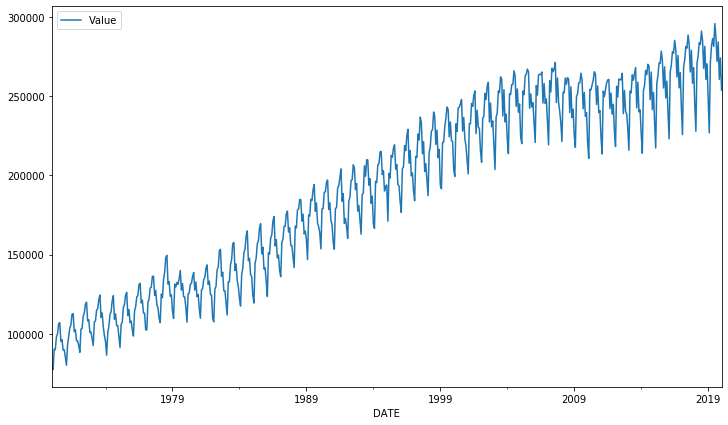

In [4]:
# plotting the dataset
df.plot(figsize=(12,7));

### Performing a Seasonal Decomposition

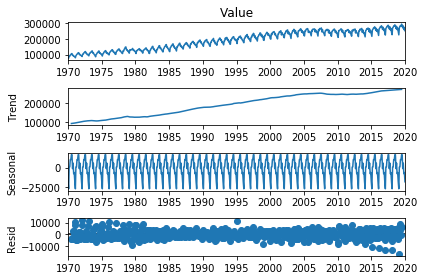

In [5]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df['Value'])
decomp.plot();

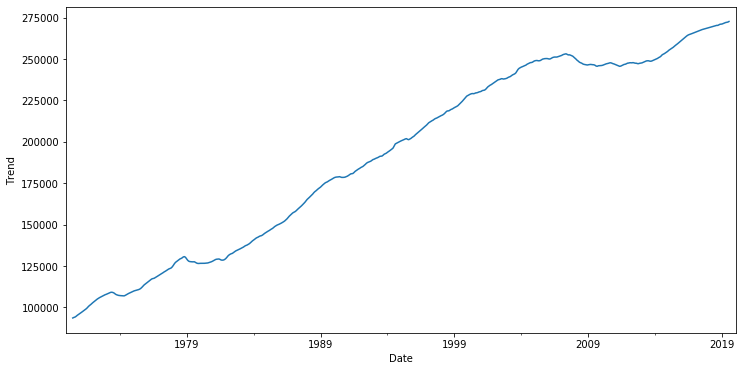

In [6]:
xlabel = 'Date'
ylabel = 'Trend'

ax = decomp.trend.plot(figsize=(12,6))
ax.set(xlabel=xlabel,ylabel=ylabel);

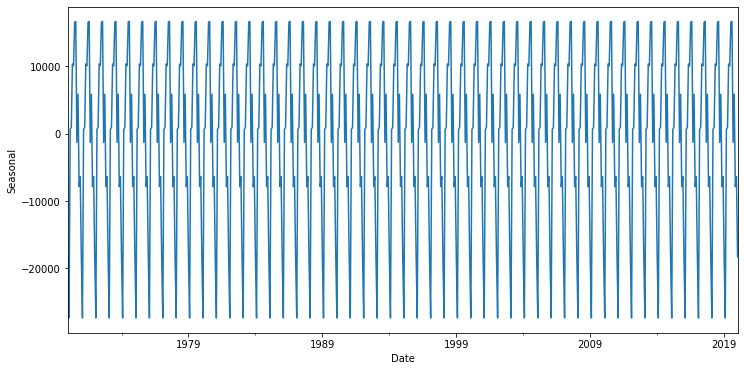

In [7]:
xlabel = 'Date'
ylabel = 'Seasonal'

ax = decomp.seasonal.plot(figsize=(12,6))
ax.set(xlabel=xlabel,ylabel=ylabel);

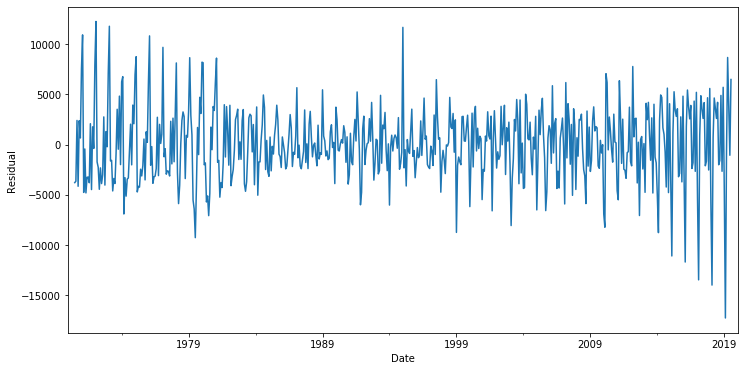

In [8]:
xlabel = 'Date'
ylabel = 'Residual'

ax = decomp.resid.plot(figsize=(12,6))
ax.set(xlabel=xlabel,ylabel=ylabel);

## Train Test Split

In [9]:
nobs = 12
train = df[:-nobs]
test = df[-nobs:]
len(test)

12

In [10]:
len(train)

589

## Scale Data

In [11]:
#
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train

array([[0.01278875],
       [0.        ],
       [0.05985099],
       [0.05860068],
       [0.09613809],
       [0.10579872],
       [0.13556735],
       [0.13826933],
       [0.08341021],
       [0.08838804],
       [0.05732696],
       [0.05838996],
       [0.0369661 ],
       [0.0125312 ],
       [0.0727334 ],
       [0.09676558],
       [0.1227505 ],
       [0.13107653],
       [0.16401073],
       [0.16483491],
       [0.11167565],
       [0.11745892],
       [0.08481974],
       [0.08463242],
       [0.07034985],
       [0.05071483],
       [0.11933673],
       [0.12079776],
       [0.15688818],
       [0.1677523 ],
       [0.19270699],
       [0.19888362],
       [0.14343447],
       [0.14703555],
       [0.10933893],
       [0.11050495],
       [0.09001297],
       [0.0708275 ],
       [0.14070907],
       [0.14365924],
       [0.17502938],
       [0.17989951],
       [0.20718156],
       [0.22001714],
       [0.15401762],
       [0.16692812],
       [0.12615022],
       [0.100

### Time Series Generator

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [16]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

### Create the Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [18]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fitting the model
model.fit_generator(generator,epochs=100)

Epoch 1/100
577/577 [==============================] - 19s 33ms/step - loss: 0.0100
Epoch 2/100
577/577 [==============================] - 16s 28ms/step - loss: 0.0050
Epoch 3/100
577/577 [==============================] - 22s 38ms/step - loss: 0.0038
Epoch 4/100
577/577 [==============================] - 22s 39ms/step - loss: 0.0027
Epoch 5/100
577/577 [==============================] - 22s 38ms/step - loss: 0.0022
Epoch 6/100
577/577 [==============================] - 23s 40ms/step - loss: 0.0019
Epoch 7/100
577/577 [==============================] - 17s 30ms/step - loss: 0.0016
Epoch 8/100
577/577 [==============================] - 18s 31ms/step - loss: 0.0018
Epoch 9/100
577/577 [==============================] - 25s 43ms/step - loss: 0.0015
Epoch 10/100
577/577 [==============================] - 35s 60ms/step - loss: 0.0011
Epoch 11/100
577/577 [==============================] - 20s 34ms/step - loss: 0.0011
Epoch 12/100
577/577 [==============================] - 18s 31ms/step - lo

577/577 [==============================] - 20s 35ms/step - loss: 3.5817e-04
Epoch 94/100
577/577 [==============================] - 19s 33ms/step - loss: 3.7425e-04
Epoch 95/100
577/577 [==============================] - 19s 33ms/step - loss: 3.5048e-04
Epoch 96/100
577/577 [==============================] - 23s 39ms/step - loss: 3.6779e-04
Epoch 97/100
577/577 [==============================] - 22s 39ms/step - loss: 3.3586e-04
Epoch 98/100
577/577 [==============================] - 24s 42ms/step - loss: 3.5530e-04
Epoch 99/100
577/577 [==============================] - 18s 31ms/step - loss: 4.0395e-04
Epoch 100/100
577/577 [==============================] - 18s 31ms/step - loss: 3.7123e-04


In [20]:
model.history.history.keys()

dict_keys(['loss'])

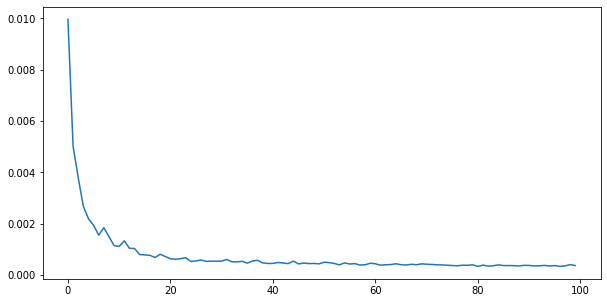

In [22]:
loss_per_epoch = model.history.history['loss']
plt.figure(figsize=(10,5))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

## Evaluate on Test Data

In [23]:
# 
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.70390593],
       [0.90501388],
       [0.92572127],
       [0.96592788],
       [0.96094068],
       [1.        ],
       [0.97190314],
       [0.88969641],
       [0.95501225],
       [0.85709937],
       [0.90344514],
       [0.8005404 ]])

In [24]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

 Generating predictions into the same time stamps as the test set

In [25]:
# CODE HERE
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

In [26]:
#
true_predictions = scaler.inverse_transform(test_predictions)

In [27]:
true_predictions

array([[230784.22260588],
       [270303.24833524],
       [275630.297221  ],
       [284888.26846939],
       [284032.52587438],
       [291670.65636289],
       [285859.20302176],
       [269826.7100268 ],
       [280977.86427641],
       [260650.72235823],
       [269484.09987032],
       [248553.50483632]])

In [28]:
#
test['Predictions'] = true_predictions
test

/home/marcelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Value,Predictions
DATE,,
2019-02-01,226799.0,230784.222606
2019-03-01,271668.0,270303.248335
2019-04-01,281646.0,275630.297221
2019-05-01,286269.0,284888.268469
2019-06-01,281345.0,284032.525874
2019-07-01,295744.0,291670.656363
2019-08-01,286857.0,285859.203022
2019-09-01,271886.0,269826.710027
2019-10-01,284089.0,280977.864276


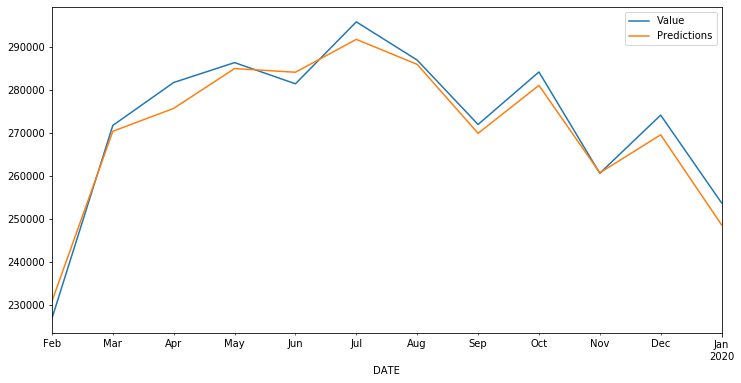

In [29]:

test.plot(figsize=(12,6));